In [40]:
import bs4 as bs
import re
import nltk
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [79]:
file = ('C:/NUS/Y4S1/DSA4262/skindiagnosis/data/scraped_data.csv')
df = pd.read_csv(file) 
df
data = np.array(df.Symptoms)
titles = np.array(df.Disease)
data

array(['Batches of welts (wheals) that can arise anywhere on the body\nWelts that might be red, purple or skin-colored, depending on your skin color\nWelts that vary in size, change shape, and appear and fade repeatedly\nItchiness (pruritus), which can be intense\nPainful swelling (angioedema) around the eyes, cheeks or lips\nFlares triggered by heat, exercise or stress\nSymptoms that persist for more than six weeks and recur often and anytime, sometimes for months or years',
       'Raised, inflamed lines where you scratched.\nWelts from friction.\nSwelling.\nItching.',
       'Welts that form in minutes to hours\nSwelling, especially around the eyes, cheeks or lips\nMild pain and warmth in the affected areas',
       ..., nan, nan, nan], dtype=object)

In [80]:
from gensim.models import Word2Vec
import gensim
from collections import namedtuple
import string
from langdetect import detect

In [81]:
SentimentDocument = namedtuple('SentimentDocument', 'words tags title original_number')
n=0
alldocs = []  # Will hold all docs in original order

regex = re.compile('[%s]' % re.escape(string.punctuation)) #to remove punctuation

for line_no, line in enumerate(data):
    if (type(line)==str):
        if (len(line)>150):
            if (detect(line) == 'en') :
                line = regex.sub('', line)
                tokens = gensim.utils.to_unicode(line).lower().split()
                words = tokens[0:]
                tags = [n]
                title = titles[line_no]
                alldocs.append(SentimentDocument(words, tags, title, line_no))
                n=n+1    

Number of Documents :  1133
Mean length of documents :  219.94439541041484


Text(0, 0.5, 'Length of the description')

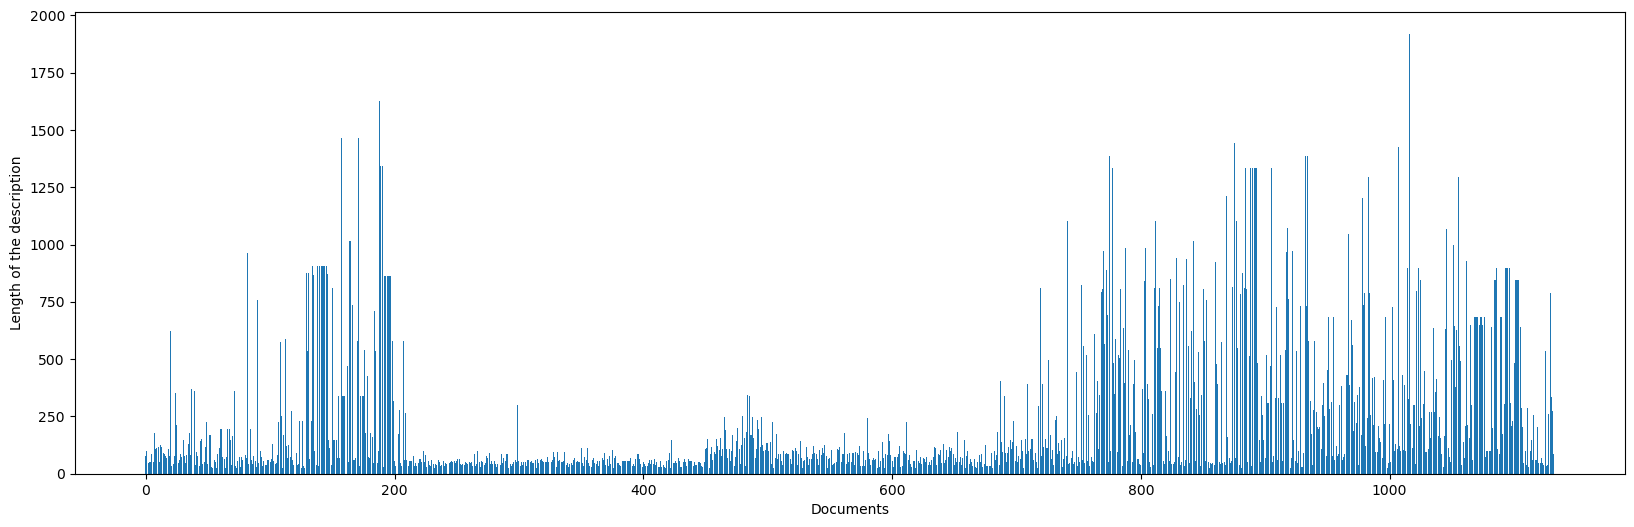

In [82]:
l = []
for doc in alldocs:
    l.append(len(doc.words))

print('Number of Documents : ', len(alldocs))
print('Mean length of documents : ', np.mean(l))

plt.figure (figsize=(20, 6))
plt.bar(range(0, len(l)), l)
plt.xlabel('Documents')
plt.ylabel('Length of the description')

In [83]:
index = 0
doc = alldocs[index]
print(doc, '\n')
print(data[doc.original_number])

SentimentDocument(words=['batches', 'of', 'welts', 'wheals', 'that', 'can', 'arise', 'anywhere', 'on', 'the', 'body', 'welts', 'that', 'might', 'be', 'red', 'purple', 'or', 'skincolored', 'depending', 'on', 'your', 'skin', 'color', 'welts', 'that', 'vary', 'in', 'size', 'change', 'shape', 'and', 'appear', 'and', 'fade', 'repeatedly', 'itchiness', 'pruritus', 'which', 'can', 'be', 'intense', 'painful', 'swelling', 'angioedema', 'around', 'the', 'eyes', 'cheeks', 'or', 'lips', 'flares', 'triggered', 'by', 'heat', 'exercise', 'or', 'stress', 'symptoms', 'that', 'persist', 'for', 'more', 'than', 'six', 'weeks', 'and', 'recur', 'often', 'and', 'anytime', 'sometimes', 'for', 'months', 'or', 'years'], tags=[0], title='Urticaria Hives', original_number=0) 

Batches of welts (wheals) that can arise anywhere on the body
Welts that might be red, purple or skin-colored, depending on your skin color
Welts that vary in size, change shape, and appear and fade repeatedly
Itchiness (pruritus), which ca

In [93]:
# Creating and training Doc2Vec Model
from gensim.models import Word2Vec, Doc2Vec

model = Doc2Vec(dm=1, vector_size=300,window=10,hs=0,min_count=10,dbow_words=1,sample=1e-5)

# build the vocabulary 
model.build_vocab(alldocs)
model.train(alldocs, total_examples=model.corpus_count, epochs=100, start_alpha=0.01, end_alpha=0.01)

In [94]:
# Save and load models
model.save("model")
# Doc2Vec.load("model")

In [95]:
model.wv.most_similar_cosmul(positive = ["patches"])

[('dark', 0.9490950703620911),
 ('scaly', 0.9442636370658875),
 ('purple', 0.9388793110847473),
 ('scalp', 0.9386978149414062),
 ('thick', 0.9381864666938782),
 ('discolored', 0.9368023872375488),
 ('forehead', 0.9286421537399292),
 ('cheeks', 0.928307831287384),
 ('rings', 0.9279539585113525),
 ('forearms', 0.9241815209388733)]

In [97]:
model.wv.most_similar_cosmul(positive = ["fever"])

[('directly', 0.9422327876091003),
 ('fatal', 0.9242735505104065),
 ('illness', 0.9241237640380859),
 ('headache', 0.919854998588562),
 ('fluid', 0.9113345742225647),
 ('potentially', 0.9063404202461243),
 ('ill', 0.9062318801879883),
 ('nodes', 0.9021396636962891),
 ('hsv', 0.9020251631736755),
 ('whitlow', 0.8992412090301514)]

In [102]:
tokens = ["pain and stiffness", "swollen toes and fingers", "increased frequency of urination", "low back pain which worsens at night", "eye inflammation"]

# Infer the document vector
new_vector = model.infer_vector(tokens, alpha=0.001, epochs=5)

# Find the top N most similar documents
N = 5  # Adjust N as needed
most_similar_documents = model.docvecs.most_similar([new_vector], topn=N)

# Print the titles and distances of the most similar documents
for tag, distance in most_similar_documents:
    doc_similar = alldocs[tag]
    print("Disease:", doc_similar.title)
    print("Distance:", tagsim[1])
    print("Symptoms:", data[doc_similar.original_number])
    print("\n")

Disease: Systematic Diseases
Distance: 0.8442375063896179
Symptoms: Warning signs can appear on your skin and nails, which is why your dermatologist may be the first doctor to notice that you have heart disease. If you know what to look for, you can also find warning signs of heart disease on your skin and nails. The following pictures show you what to look for.Swelling in your feet and lower legs




What it may be telling you: Your heart isnâ€™t working properly.

Many diseases of the heart cause fluid to build up in your feet and lower legs. As the fluid builds up, you may see swelling, which can extend as far as the upper legs and groin.
Medical name: Edema (medical term for swelling)Blue or purple color on your skin
What it may be telling you: You have a blockage in a blood vessel.
    





When youâ€™re extremely cold, your skin can turn blue (or purple). If an area of your skin is blue (or purple) when youâ€™re warm, thatâ€™s can be a sign your blood isnâ€™t getting enough oxyg

c:\Users\ziyuu\anaconda3\envs\NUS\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  


In [101]:
tokens = ["Facial redness and flushing. Rosacea can make your face flush more easily. Over time, you may notice that your face stays red. Depending on skin color, redness may be subtle or look more pink or purple. Eye problems. Many people with rosacea also have dry, irritated, swollen eyes and eyelids. This is known as ocular rosacea. Eye symptoms may show up before, after or at the same time as skin symptoms. Enlarged nose. Over time, rosacea can thicken the skin on the nose, causing the nose to look bigger. This condition also is called rhinophyma. It occurs more often in men than in women."]

# Infer the document vector
new_vector = model.infer_vector(tokens, alpha=0.001, epochs=5)

# Find the top N most similar documents
N = 5  # Adjust N as needed
most_similar_documents = model.docvecs.most_similar([new_vector], topn=N)

# Print the titles and distances of the most similar documents
for tag, distance in most_similar_documents:
    doc_similar = alldocs[tag]
    print("Title:", doc_similar.title)
    print("Distance:", tagsim[1])
    print("Document:", data[doc_similar.original_number])
    print("\n")

Title: Benign Tumors
Distance: 0.8442375063896179
Document: A small, round bump under the skin, usually on the face, neck or trunk
A tiny blackhead plugging the central opening of the cyst
A thick, yellow, smelly material that sometimes drains from the cyst
Redness, swelling and tenderness in the area, if inflamed or infected
Most epidermoid cysts don't cause problems or need treatment. See your doctor if you have one or more that:
Grows rapidly
Ruptures or becomes painful or infected
Occurs in a spot that's constantly irritated
Bothers you for cosmetic reasons
Is in an unusual location, such as a finger and toe
The surface of your skin (epidermis) is made up of a thin, protective layer of cells that your body continuously sheds. Most epidermoid cysts form when these cells move deeper into your skin and multiply rather than slough off. Sometimes the cysts form due to irritation or injury of the skin or the most superficial portion of a hair follicle.The epidermal cells form the walls o

c:\Users\ziyuu\anaconda3\envs\NUS\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  


In [28]:
try:
    import string
    from nltk.corpus import stopwords
    import nltk
except Exception as e:
    print(e)

class PreProcessText(object):
    def __init__(self):
        pass
    def __remove_punctuation(self,text):
        message = []
        for x in text: 
            if x in string.punctuation:
                pass
            else:
                message.append(x)
        message = ''.join(message)
        return message 
    
    def __remove_stopwords(self , text):
        words = []
        for x in text.split():
            if x.lower() in stopwords.words():
                pass
            else:
                words.append(x)
        return words 
    
        print(words)
    
    def token_words(self, text = ''): #takes string, return token also called list of words that is used to train the model 
        message = self.__remove_punctuation(text)
        words = self.__remove_stopwords(message)
        return words



    

In [26]:
import nltk
flag = nltk.download("stopwords")
if (flag == "False" or flag == False):
    print("Failed to Download stop words")
else: 
    print("Downloaded Stop words")
    helper = PreProcessText()
    words = helper.token_words(text=df)

Downloaded Stop words
0       Batches of welts (wheals) that can arise anywh...
1       Raised, inflamed lines where you scratched.\nW...
2       Welts that form in minutes to hours\nSwelling,...
3       A round or oval-shaped waxy or rough bump, typ...
4       \nA small, round bump under the skin, usually ...
                              ...                        
2386                                                  NaN
2387                                                  NaN
2388                                                  NaN
2389                                                  NaN
2390                                                  NaN
Name: Symptoms, Length: 2391, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziyuu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from gensim.models import Word2Vec

c:\Users\ziyuu\anaconda3\envs\NUS\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
model = Word2Vec([words], size = 100, window = 5, min_count = 1, workers = 4)

NameError: name 'words' is not defined